In [1]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap
mpl.rcParams['figure.figsize'] = [12, 8]
mpl.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower
mpl.rcParams['axes.edgecolor']='#FA6E4F'
mpl.rcParams['font.family'] = 'monospace'
import warnings
warnings.filterwarnings('ignore')

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize
import matplotlib.pyplot as plt
from IPython.display import clear_output
import ott_cleaning

In [3]:
ott = pd.read_csv('data/ott_tv_movie.csv')

In [4]:
ott.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19925 entries, 0 to 19924
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    19925 non-null  int64  
 1   show_id       19925 non-null  object 
 2   type          19925 non-null  object 
 3   title         19925 non-null  object 
 4   country       18021 non-null  object 
 5   release_year  19925 non-null  int64  
 6   genres        19925 non-null  object 
 7   description   19925 non-null  object 
 8   platform      19925 non-null  object 
 9   duration      14994 non-null  float64
 10  seasons       4928 non-null   float64
 11  num_country   19925 non-null  int64  
 12  num_genres    19925 non-null  int64  
 13  rating        19925 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 2.1+ MB


In [5]:
long_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D", '#F69EAF', '#8F8CBC', '#7C5396', '#EA6382', '#6BEAF3', '#5A9DE2', '#DDAD64', '#EA876B', '#B98174', '#357866', '#625586', '#647B99']
custom_palette1 = sns.color_palette(long_palette)

short_palette = ["#FA6E4F", "#F2CF59", "#FB8E7E", "#C5D7C0", "#8EC9BB", "#F8CA9D"]
custom_palette2 = sns.color_palette(short_palette)

watermelon_colors = ['#84e3c8', '#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94', '#ff7480']
custom_palette3 = sns.color_palette(watermelon_colors)

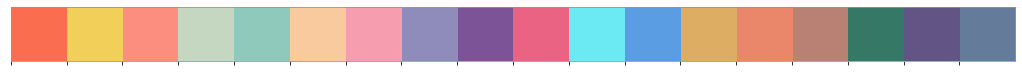

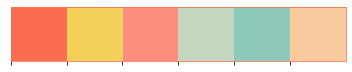

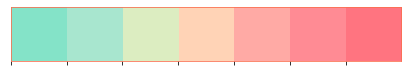

In [6]:
sns.palplot(sns.color_palette(long_palette))
sns.palplot(sns.color_palette(short_palette))
sns.palplot(sns.color_palette(watermelon_colors))

In [7]:
# missing values
pd.DataFrame(ott.isnull().sum(), columns=['No. of Missing values'])

,No. of Missing values
Unnamed: 0,0
show_id,0
type,0
title,0
country,1904
release_year,0
genres,0
description,0
platform,0
duration,4931


In [8]:
# missing percentage
missing_percent = round(ott.isna().mean() * 100, 1)
pd.DataFrame(missing_percent[missing_percent > 0], columns=['% of Missing Values'])

,% of Missing Values
country,9.6
duration,24.7
seasons,75.3


In [9]:
# round(pd.DataFrame(ott.type.value_counts())*100 / len(ott),1)
pd.DataFrame(round(ott.type.value_counts()*100 / len(ott),1)).rename({'type':'% of data'},axis=1)

,% of data
Movie,75.3
TV Show,24.7


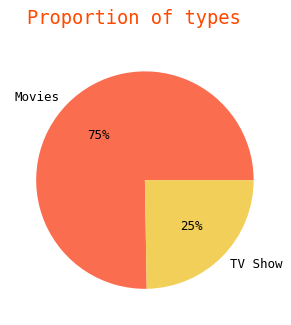

In [20]:
fig, ax = plt.subplots(figsize=(10,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

plt.pie(ott.type.value_counts(),colors=custom_palette1,labels=['Movies','TV Show'], autopct='%.0f%%');

fig.suptitle('Proportion of types', fontsize=15, color = '#ff4800');

Movies have duration and TV shows have seasons

In [10]:
ott.release_year.min() # 1920
ott.release_year.max() # 2021

2021

In [138]:
bins = [0, 1940, 1960, 1980, 2000, 2020,np.inf]
names = ['1920-1940','1940-1960','1960-1980','1980-2000','2000-2020','>2020']

ott['release_year_category'] = pd.cut(ott['release_year'], bins, labels=names)

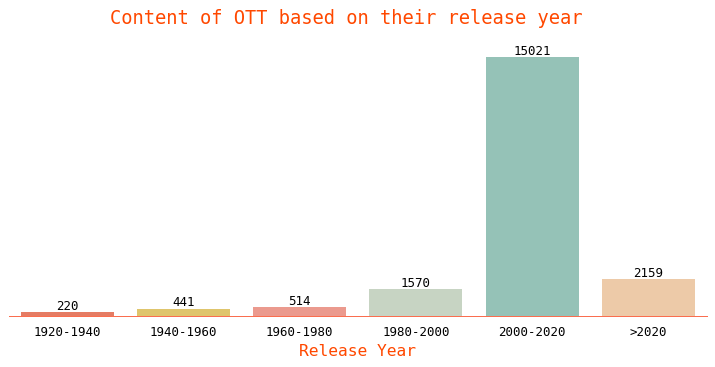

In [139]:
release_year = ott['release_year_category'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.countplot(data=ott, x='release_year_category', palette=custom_palette1);

# add values on top of each bar
ax.bar_label(ax.containers[0])

ax.set_xlabel('Release Year', fontsize=13, color = '#ff4800');
fig.suptitle('Content of OTT based on their release year', fontsize=15, color = '#ff4800');

OTT has more contents in the years 2000-2020. 

In [48]:
# number of unique years in each category
len(ott[(ott.release_year > 0) & (ott.release_year <=1940)]['release_year'].unique())

20

OTT has content in all the years falling under each category starting from 1920. The numbers in each category corresponds to content spread over 20 years except for >2020 which has only 1. 

In [140]:
release_per_year_category = round(ott['release_year_category'].value_counts().loc[['1920-1940','1940-1960','1960-1980','1980-2000','2000-2020']] / 20,0)
release_per_year_category.loc['>2020'] = 2159

In [141]:
release_per_catgory = pd.DataFrame(release_per_year_category).rename({'release_year_category':'num_per_cat'},axis=1)

In [142]:
release_per_catgory['num_per_cat']

1920-1940      11.0
1940-1960      22.0
1960-1980      26.0
1980-2000      78.0
2000-2020     751.0
>2020        2159.0
Name: num_per_cat, dtype: float64

In [143]:
release_per_catgory.index

CategoricalIndex(['1920-1940', '1940-1960', '1960-1980', '1980-2000',
                  '2000-2020', '>2020'],
                 categories=['1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020', '>2020'], ordered=True, dtype='category')

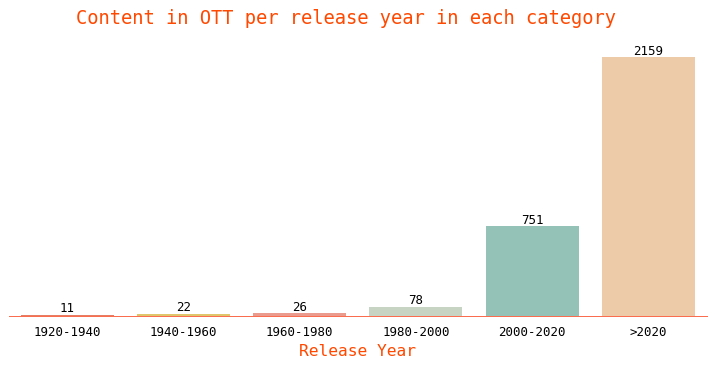

In [144]:
fig, ax = plt.subplots(figsize=(10,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

sns.barplot(data=release_per_catgory, x=release_per_catgory.index,y='num_per_cat', palette=custom_palette1);

ax.bar_label(ax.containers[0])

ax.set_xlabel('Release Year', fontsize=13, color = '#ff4800');
fig.suptitle('Content in OTT per release year in each category', fontsize=15, color = '#ff4800');

The number of contents in OTT per year in each category is increasing exponentially

In [178]:
exp_fit_x = release_per_catgory.loc[['1920-1940', '1940-1960', '1960-1980', '1980-2000',
                  '2000-2020']]

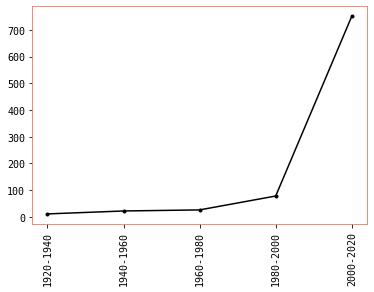

In [179]:
plt.plot(exp_fit_x.num_per_cat,marker='.',color='k')
plt.xticks(rotation=90);

In [171]:
def monoExp(x, m, t, b):
    return m * np.exp(t * x) + b

In [183]:
p0 = [1,0.1,50]
params, cv = scipy.optimize.curve_fit(monoExp, range(len(exp_fit_x.num_per_cat)), 
                                      exp_fit_x.num_per_cat,
                                      p0=p0,maxfev=10000)

In [184]:
m, t, b = params

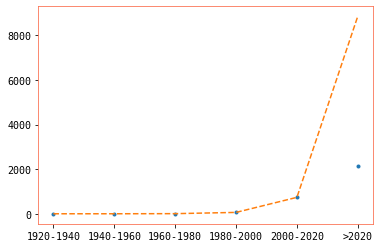

In [185]:
plt.plot(release_per_catgory.num_per_cat, '.', label="data")
plt.plot(monoExp(range(len(release_per_catgory.num_per_cat)), m, t, b), '--', label="fitted")

In [187]:
round(monoExp(range(len(release_per_catgory.num_per_cat)), m, t, b)[-1])

8836

In [189]:
squaredDiffs = np.square(exp_fit_x.num_per_cat - monoExp(range(len(exp_fit_x.num_per_cat)), m, t, b))
squaredDiffsFromMean = np.square(exp_fit_x.num_per_cat - np.mean(exp_fit_x.num_per_cat))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

R² = 0.999827705835495


The fit explains 99% of the variance in the data

In [191]:
ott.platform.value_counts()

Prime      9668
Netflix    8807
Disney+    1450
Name: platform, dtype: int64

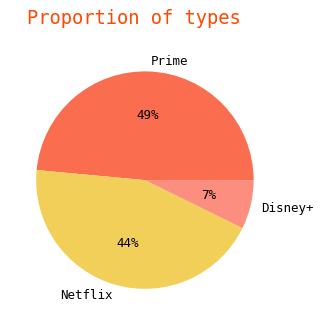

In [192]:
fig, ax = plt.subplots(figsize=(10,4), dpi=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom=False)
ax.get_yaxis().set_visible(False)

plt.pie(ott.platform.value_counts(),colors=custom_palette1,labels=['Prime','Netflix','Disney+'], autopct='%.0f%%');

fig.suptitle('Proportion of types', fontsize=15, color = '#ff4800');

**Between the years 2020-2040, we can expect 1,76,720 new contents just in Netflix, PrimeVideo and Disney+**<br>
** 86593 Prime, 77757 Netflix, and**